In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
print('Positive Values in Quantity ',sum(n>0 for n in df['Quantity']))
print('Negative Values in Quantity ',sum(n<0 for n in df['Quantity']))

Positive Values in Quantity  531285
Negative Values in Quantity  10624


In [11]:
cancel  = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancel.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [13]:
cancel[cancel['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [15]:
temp = df.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = temp.rename(columns={'InvoiceDate': 'Number of Products'})
transaction_df.head()

,InvoiceNo,CustomerID,Number of Products
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


Text(0.5,1,'Product Wise Graph')

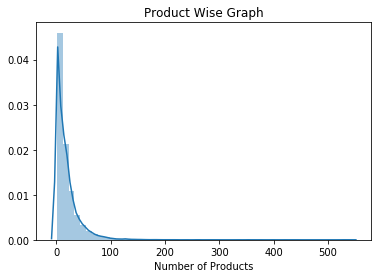

In [24]:
fig ,ax=plt.subplots()
sns.distplot(transaction_df['Number of Products'],ax=ax)
ax.set_title('Product Wise Graph')


In [18]:
df['total_cost'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


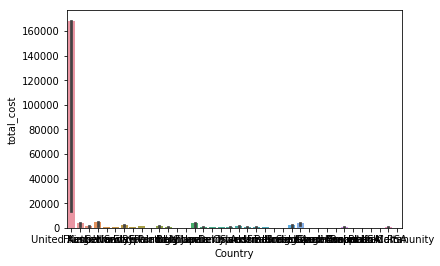

In [19]:
fig,ax = plt.subplots()
ax = sns.barplot(x='Country',y='total_cost',data=df,estimator=max,ax=ax)
plt.show()


In [25]:
uk_detail =  df[df['Country']=='United Kingdom']
uk_detail.describe()

,Quantity,UnitPrice,CustomerID,total_cost
count,495478.000000,495478.000000,361878.000000,495478.000000
mean,8.605486,4.532422,15547.871368,16.525065
std,227.588756,99.315438,1594.402590,394.839116
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,14194.000000,3.290000
50%,3.000000,2.100000,15514.000000,8.290000
75%,10.000000,4.130000,16931.000000,16.630000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [26]:
uk_detail = uk_detail[uk_detail['Quantity']>0]
uk_detail.shape

(486286, 9)

In [31]:
uk_detail.dropna(subset=['CustomerID'],inplace=True)
uk_detail.shape

(354345, 9)

In [32]:
uk_detail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
total_cost     0
dtype: int64

In [33]:
uk_detail['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [49]:
now = dt.date(2018,12,9)
print(now)

2018-12-09


In [50]:
uk_detail['date'] = uk_detail['InvoiceDate'].dt.date

In [51]:
uk_detail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [55]:
recency_df = uk_detail.groupby(by='CustomerID',as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [56]:
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x:(now-x).days)

In [57]:
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,2882
1,12747.0,2011-12-07,2559
2,12748.0,2011-12-09,2557
3,12749.0,2011-12-06,2560
4,12820.0,2011-12-06,2560


In [58]:
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)

In [73]:
#Calculating Frequency of Each Customer 
uk_detail_copy = uk_detail
uk_detail_copy.drop_duplicates(subset=['InvoiceID','CustomerID'],keep='first',inplace=True)
#drop duplicate item from dataset
freq = uk_detail_copy.groupby(by=['CustomerID'],as_index=False)['InvoiceNo'].count()
#group the Invoice No 
freq.columns = ['CustomerID','Frequency']
freq.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,1
2,12748.0,1
3,12749.0,1
4,12820.0,1


In [74]:
#Create column Total Cost
uk_detail['TotalCost'] = uk_detail['Quantity'] * uk_detail['UnitPrice']

In [77]:
monetary_df = uk_detail.groupby(by='CustomerID',as_index=False).agg({'TotalCost':'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,30.60
2,12748.0,4.95
3,12749.0,19.90
4,12820.0,13.20


# RFM TABLE

In [78]:
temp_df = recency_df.merge(freq,on='CustomerID')
temp.head()

,InvoiceNo,CustomerID,InvoiceDate
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


In [79]:
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,2882,1,77183.60
1,12747.0,2559,1,30.60
2,12748.0,2557,1,4.95
3,12749.0,2560,1,19.90
4,12820.0,2560,1,13.20


In [80]:
cr_df = rfm_df
cr_df['Rank'] = cr_df['Monetary'].rank(ascending=0)
cr_df.head()

,CustomerID,Recency,Frequency,Monetary,Rank
0,12346.0,2882,1,77183.60,1.0
1,12747.0,2559,1,30.60,828.0
2,12748.0,2557,1,4.95,3404.0
3,12749.0,2560,1,19.90,1323.5
4,12820.0,2560,1,13.20,2508.5


In [81]:
cr_df.sort_values('Rank',ascending=True).head(10)

,CustomerID,Recency,Frequency,Monetary,Rank
0,12346.0,2882,1,77183.60,1.0
2095,15749.0,2792,1,4921.50,2.0
1683,15195.0,2559,1,3861.00,3.0
3774,18087.0,2655,1,3202.92,4.0
226,13135.0,2753,1,3096.00,5.0
3596,17846.0,2642,1,2033.10,6.0
3784,18102.0,2557,1,1950.24,7.0
2662,16532.0,2574,1,1910.40,8.0
3676,17949.0,2558,1,1314.00,9.0
2271,16000.0,2559,1,1190.40,10.0
